# 导入包

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 数据准备

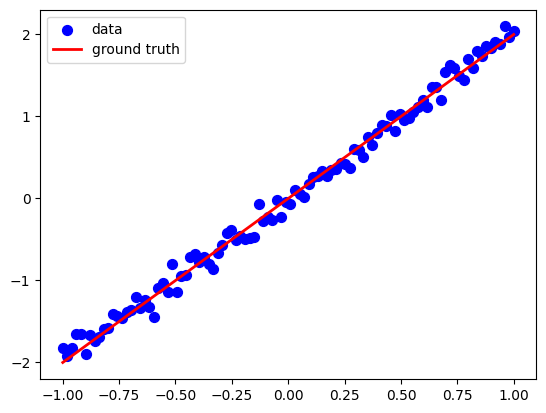

In [7]:
# 设置随机种子，确保结果可重复
np.random.seed(0)
torch.manual_seed(0)

# 生成一些合成数据
X = np.linspace(-1, 1, 100)[:, np.newaxis]  # 形状 (100, 1)
y = X * 2 + np.random.normal(0, 0.1, size=X.shape)  # y = 2X + noise

# 将 NumPy 数组转换为 PyTorch 张量
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# 可视化数据
plt.scatter(X, y, s=50, c='blue', label='data')
plt.plot(X, 2 * X, color='red', linewidth=2, label='ground truth')
plt.legend()
plt.show()

# 构建模型

In [14]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

# 实例化模型
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)

In [9]:
print (model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


# 定义损失函数

In [16]:
criterion = nn.MSELoss()

# 定义优化器

In [17]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练模型

Epoch [100/1000], Loss: 1.2213
Epoch [200/1000], Loss: 0.4615
Epoch [300/1000], Loss: 0.1477
Epoch [400/1000], Loss: 0.0435
Epoch [500/1000], Loss: 0.0165
Epoch [600/1000], Loss: 0.0110
Epoch [700/1000], Loss: 0.0102
Epoch [800/1000], Loss: 0.0101
Epoch [900/1000], Loss: 0.0101
Epoch [1000/1000], Loss: 0.0101


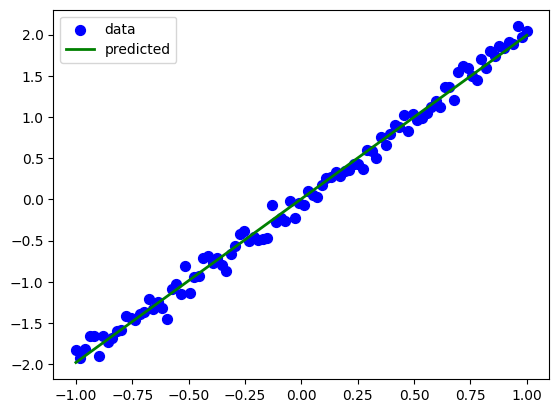

In [18]:
num_epochs = 1000

for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X_tensor)
    
    # 计算损失
    loss = criterion(outputs, y_tensor)
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))

# 可视化训练后的结果
predicted = model(X_tensor).detach().numpy()
plt.scatter(X, y, s=50, c='blue', label='data')
plt.plot(X, predicted, color='green', linewidth=2, label='predicted')
# plt.plot(X, 2 * X, color='red', linewidth=2, label='ground truth')
plt.legend()
plt.show()

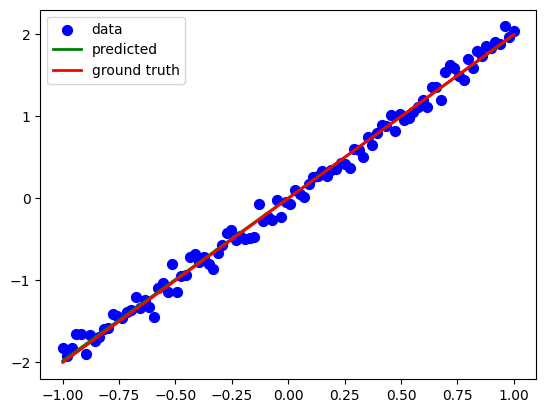

In [19]:
# 可视化训练后的结果
predicted = model(X_tensor).detach().numpy()
plt.scatter(X, y, s=50, c='blue', label='data')
plt.plot(X, predicted, color='green', linewidth=2, label='predicted')
plt.plot(X, 2 * X, color='red', linewidth=2, label='ground truth')
plt.legend()
plt.show()